# Deskripsi Proyek
1. Perusahaan Megaline mewarkan klien nya dua paket prabayar, Surf dan Ultimate.
2. Departemen Periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.
3. 500 data klien di tahun 2018
4. menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.


## Pra-pemrosesan

### Library yang di butuhkan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st


### Memuat dan menampilan informasi data

In [2]:
try :
  df_calls = pd.read_csv('/datasets/megaline_calls.csv')
  df_internet = pd.read_csv('/datasets/megaline_internet.csv')
  df_messages = pd.read_csv('/datasets/megaline_messages.csv')
  df_plans = pd.read_csv('/datasets/megaline_plans.csv')
  df_users = pd.read_csv('/datasets/megaline_users.csv')
except:
  df_calls = pd.read_csv('/content/megaline_calls.csv')
  df_internet = pd.read_csv('/content/megaline_internet.csv')
  df_messages = pd.read_csv('/content/megaline_messages.csv')
  df_plans = pd.read_csv('/content/megaline_plans.csv')
  df_users = pd.read_csv('/content/megaline_users.csv') 

#### Data Calls

In [3]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
df_calls.duplicated().sum()

0

#### Data Internet

In [7]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
df_internet.duplicated().sum()

0

#### Data Messages

In [11]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [14]:
df_messages.duplicated().sum()

0

#### Data Plans

In [15]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [17]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [18]:
df_plans.duplicated().sum()

0

#### Data Users

In [19]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [22]:
df_users.duplicated().sum()

0

Kesimpulan Dari Keseluruhan data :
1. tidak ada data yang hilang yang perlu diperbaiki
2. tidak memiliki data yang duplikat
3. setiap data memiliki jumlah row dan column yang berbeda
4. setiap data memiliki type yang salah untuk kolom date dan perlu di rubah.

### Memperbaiki Tipe Data dan menambahkan kolom baru yang dibutuhkan

In [23]:
#Fungsi Menambahkan kolom month_year
def month_year(data,column):
    data[column] = data[column].astype('datetime64')
    data['month'] = data [column].dt.month.astype('str')
    data['year'] = data [column].dt.year.astype('str')
    data['month_year'] = df_calls['month'] + '-' + df_calls['year']

#### Data Calls

In [24]:
month_year(df_calls,'call_date')

In [25]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [26]:
df_calls.head()

,id,user_id,call_date,duration,month,year,month_year
0,1000_93,1000,2018-12-27,9.0,12,2018,12-2018
1,1000_145,1000,2018-12-27,14.0,12,2018,12-2018
2,1000_247,1000,2018-12-27,15.0,12,2018,12-2018
3,1000_309,1000,2018-12-28,6.0,12,2018,12-2018
4,1000_380,1000,2018-12-30,5.0,12,2018,12-2018


Untuk Data Calls pada kolom duration, setiap panggilan individual dibulatkan ke atas.

#### Data Internet

In [27]:
month_year(df_internet,'session_date')

In [28]:
df_internet.head()

,id,user_id,session_date,mb_used,month,year,month_year
0,1000_13,1000,2018-12-29,89.86,12,2018,12-2018
1,1000_204,1000,2018-12-31,0.00,12,2018,12-2018
2,1000_379,1000,2018-12-28,660.40,12,2018,12-2018
3,1000_413,1000,2018-12-26,270.99,12,2018,12-2018
4,1000_442,1000,2018-12-27,880.22,12,2018,12-2018


#### Data Messages

In [29]:
month_year(df_messages,'message_date')

In [30]:
df_messages.head()

,id,user_id,message_date,month,year,month_year
0,1000_125,1000,2018-12-27,12,2018,12-2018
1,1000_160,1000,2018-12-31,12,2018,12-2018
2,1000_223,1000,2018-12-31,12,2018,12-2018
3,1000_251,1000,2018-12-27,12,2018,12-2018
4,1000_255,1000,2018-12-26,12,2018,12-2018


Kesimpulan

dari data calls, internet dan messages memiliki tipe data yang sudah dirubah menjadi date time dan ditambahkan kolom baru Month_year untuk memudahkan grouping ke depan nya.

### Mengelompokan data berdasarkan user_id dan month_year

#### Group Calls
Setelah kolom duration di bulatkan ke atas setelah nya diperlukan grouping berdasarkan user id dan month year

In [31]:
group_calls = df_calls.groupby(['user_id','month_year'])['duration'].sum().reset_index().rename(columns={"duration":"calls"})

In [32]:
group_calls.head()

,user_id,month_year,calls
0,1000,12-2018,124.0
1,1001,10-2018,393.0
2,1001,11-2018,426.0
3,1001,12-2018,412.0
4,1001,8-2018,182.0


In [33]:
group_calls[group_calls['calls'] == 0]

,user_id,month_year,calls
432,1094,10-2018,0.0
1873,1407,11-2018,0.0


Pada data calls user id hanya ada 2 user yang tidak menggunakan layanan panggilan. dikarenakan hanya ada 2 data akan dibiarkan saja karna tidak mengganggu dalam analisa kedepannya

#### Group Internet

Pada Data Internet , Jika total pemakaian internet dalam sebulan melebihi 1024 mb akan dikenakan 2gigabit, bisa juga dimaksud di bulatkan ke atas

In [34]:
group_internet = df_internet.groupby(['user_id','month_year'])['mb_used'].sum().reset_index()

In [35]:
#Membulatkan ke atas untuk kolom duration
group_internet['gb_used'] = np.ceil(group_internet['mb_used']/1024)
group_internet = group_internet.drop(columns = 'mb_used')

In [36]:
group_internet.head()

,user_id,month_year,gb_used
0,1000,12-2018,2.0
1,1001,10-2018,20.0
2,1001,11-2018,21.0
3,1001,12-2018,19.0
4,1001,8-2018,7.0


#### Group  Messages

In [37]:
df_messages.head()

,id,user_id,message_date,month,year,month_year
0,1000_125,1000,2018-12-27,12,2018,12-2018
1,1000_160,1000,2018-12-31,12,2018,12-2018
2,1000_223,1000,2018-12-31,12,2018,12-2018
3,1000_251,1000,2018-12-27,12,2018,12-2018
4,1000_255,1000,2018-12-26,12,2018,12-2018


In [38]:
group_messages = df_messages.groupby(['user_id','month_year'])['id'].count().reset_index().rename(columns = {"id" :"messages"})

In [39]:
group_messages.head()

,user_id,month_year,messages
0,1000,12-2018,11
1,1001,10-2018,52
2,1001,11-2018,48
3,1001,12-2018,47
4,1001,8-2018,21


Kesimpulan 
1. Data Calls = pertama kolom duration di bulatkan ke atas setiap panggilan individu, setelah itu di kelompokan berdasarkan user id dan bulan
2. Data Internet = Pertama data di kelompokan terlebih dahulu dengan penjumlahan berdasarkan user id dan bulan, lalu total pemakaian perbulan dirubah ke gigabit dengan dibagi 1024mb per gigabit nya dan hasilnya di bulatkan ke atas.
3. Data Messages = dikelompokan berdasarkan user id dan bulan lalu dihitung total count nya setiap id, 

### Menggabungkan Data

#### Menggabungkan Data Calls dan Internet

In [40]:
group_internet.shape , group_calls.shape

((3611, 3), (2258, 3))

In [41]:
merge_data = pd.merge(group_calls,group_internet,on=['user_id','month_year'], how='outer')

In [42]:
merge_data.isna().sum()

user_id          0
month_year       0
calls         1585
gb_used        232
dtype: int64

In [43]:
merge_data = merge_data.fillna(0)

In [44]:
merge_data.sample(5)

,user_id,month_year,calls,gb_used
2452,1069,5-2018,0.0,9.0
1154,1251,7-2018,590.0,0.0
1764,1387,9-2018,513.0,6.0
3718,1472,11-2018,0.0,13.0
2976,1228,8-2018,0.0,2.0


#### Menggabungkan merge_data dengan data_messages

In [45]:
merge_data.shape , group_messages.shape

((3843, 4), (2950, 3))

In [46]:
merge_data = pd.merge(merge_data,group_messages,on=['user_id','month_year'], how='outer')

In [47]:
merge_data.isna().sum()

user_id          0
month_year       0
calls          467
gb_used        467
messages      1360
dtype: int64

In [48]:
merge_data = merge_data.fillna(0)

In [49]:
merge_data.sample(5)

,user_id,month_year,calls,gb_used,messages
534,1114,7-2018,238.0,9.0,25.0
2316,1016,8-2018,0.0,10.0,9.0
3957,1132,3-2018,0.0,0.0,32.0
1898,1412,11-2018,955.0,19.0,96.0
2938,1215,6-2018,0.0,15.0,22.0


#### Menggabungkan data Users dan data Plans

In [50]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [51]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [52]:
#Membuang kolom yang tidak di perlukan pada data users
df_users = df_users.drop(columns = ['first_name','last_name','age','reg_date','churn_date'])

In [53]:
#Mengganti kolom plan_name pada data plan menjadi plan agar sama dengan data users
df_plans = df_plans.rename(columns = {"plan_name" : "plan"})

In [54]:
#merge data users dan data plan
merge_user = pd.merge(df_users,df_plans,on = 'plan')

In [55]:
#membagi kolom mb_per_month_included dengan 1024 aga menjadi gb_per_month_included
merge_user['mb_per_month_included'] = merge_user['mb_per_month_included']/ 1024
merge_user = merge_user.rename(columns={"mb_per_month_included": "gb_per_month_included" })

In [56]:
merge_user.sample(5)

,user_id,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
24,1063,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
142,1453,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
130,1424,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01
491,1488,"Baton Rouge, LA MSA",surf,50,15.0,500,20,10,0.03,0.03
156,1482,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01


#### Menggabungkan merge user dan merge data

In [57]:
merge_user.shape , merge_data.shape

((500, 10), (4310, 5))

In [58]:
merge_full = pd.merge(merge_data,merge_user,on = 'user_id',how='inner')

In [59]:
merge_full.sample(3)

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
2443,1288,8-2018,0.0,8.0,0.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15.0,500,20,10,0.03,0.03
1168,1139,12-2018,333.0,5.0,34.0,"New Orleans-Metairie, LA MSA",surf,50,15.0,500,20,10,0.03,0.03
1092,1128,12-2018,101.0,13.0,31.0,"Knoxville, TN MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01


In [60]:
merge_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4310 entries, 0 to 4309
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4310 non-null   int64  
 1   month_year             4310 non-null   object 
 2   calls                  4310 non-null   float64
 3   gb_used                4310 non-null   float64
 4   messages               4310 non-null   float64
 5   city                   4310 non-null   object 
 6   plan                   4310 non-null   object 
 7   messages_included      4310 non-null   int64  
 8   gb_per_month_included  4310 non-null   float64
 9   minutes_included       4310 non-null   int64  
 10  usd_monthly_pay        4310 non-null   int64  
 11  usd_per_gb             4310 non-null   int64  
 12  usd_per_message        4310 non-null   float64
 13  usd_per_minute         4310 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 505.1+ 

Kesimpulan

Merge Full adalah gabungan dari seluruh data yang dibutuhkan seperti( calls,internet,messages,plan,user) agar dapat cari keuntungan dari setiap user perbulan nya

### Menghitung Pendapatan bulanan setiap user

In [61]:
merge_full.sample()

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
120,1016,12-2018,837.0,0.0,21.0,"Fresno, CA MSA",surf,50,15.0,500,20,10,0.03,0.03


#### keuntungan Calls

In [62]:
#Fungsi Keuntungan Calls
def pay_over_calls(data):
    a = data['calls']
    b = data['minutes_included']
    c = data['usd_per_minute']
    if a > b:
        return (a - b)*c
    return 0

In [63]:
merge_full['pay_over_calls'] = merge_full.apply(pay_over_calls,axis=1)

In [64]:
merge_full[merge_full['pay_over_calls']>0].sample()

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,pay_over_calls
3624,1431,12-2018,670.0,9.0,33.0,"Sacramento–Roseville–Folsom, CA MSA",surf,50,15.0,500,20,10,0.03,0.03,5.1


In [65]:
print('Keuntungan Total dari over calls =',merge_full['pay_over_calls'].sum())

Keuntungan Total dari over calls = 2900.2499999999995


#### keuntungan dari Internet

In [66]:
#Fungsi Keuntungan Internet
def pay_over_internet(data):
    a = data['gb_used']
    b = data['gb_per_month_included']
    c = data['usd_per_gb']
    if a > b:
        return (a - b)*c
    return 0

In [67]:
merge_full['pay_over_internet'] = merge_full.apply(pay_over_internet,axis=1)

In [68]:
merge_full[merge_full['pay_over_internet']>0].sample()

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,pay_over_calls,pay_over_internet
4228,1498,8-2018,266.0,31.0,0.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15.0,500,20,10,0.03,0.03,0.0,160.0


In [69]:
print('Keuntungan Total dari over Internet =',merge_full['pay_over_internet'].sum())

Keuntungan Total dari over Internet = 67947.0


#### Keuntungan Messages

In [70]:
#Fungsi Keuntungan Messages
def pay_over_messages(data):
    a = data['messages']
    b = data['messages_included']
    c = data['usd_per_message']
    if a > b:
        return (a - b)*c
    return 0

In [71]:
merge_full['pay_over_messages'] = merge_full.apply(pay_over_messages,axis=1)

In [72]:
merge_full[merge_full['pay_over_messages']>0].sample()

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,pay_over_calls,pay_over_internet,pay_over_messages
2289,1268,10-2018,457.0,63.0,55.0,"Fresno, CA MSA",surf,50,15.0,500,20,10,0.03,0.03,0.0,480.0,0.15


In [73]:
print('Keuntungan Total dari over messages =',merge_full['pay_over_messages'].sum())

Keuntungan Total dari over messages = 287.13


#### Total Keuntungan

In [74]:
merge_full['total_pay'] = merge_full['usd_monthly_pay'] + merge_full['pay_over_calls'] + merge_full['pay_over_internet'] +merge_full['pay_over_messages']

In [75]:
merge_full.sample()

,user_id,month_year,calls,gb_used,messages,city,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,pay_over_calls,pay_over_internet,pay_over_messages,total_pay
2976,1352,9-2018,602.0,9.0,16.0,"Seattle-Tacoma-Bellevue, WA MSA",ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


In [76]:
print('Total Pemasukan yang dihasilkan adalah',merge_full['total_pay'].sum())

Total Pemasukan yang dihasilkan adalah 227084.38


KESIMPULAN
Setelah melakukan Prosesing data yang meiliputi penambahan kolom baru di setiap data awal, setelah itu dilakukan grouping agar dapat di gabungkan antara data 1 dengan data yang lain nya, menghasilkan Data akhir yang dapat di Analaisa.

## Analisis Data

Menghitung Rata rata, varians, standar deviasinya dan histogram. 

yang di butuhkan setiap paket per bulan untuk Pesan, Volume Penggunaan data, dan durasi Menelepon.

### Data Calls

In [77]:
# Cek besarnya nilai 0 pada kolom calls terhadap total data
merge_full[merge_full['calls'] == 0]['calls'].count() / len(merge_full['calls']) * 100

47.65661252900232

Dikarenakan nilai 0 pada kolom calls sebesar 47 % dari total data, maka sebelum menganalisa lebih lanjut nilai 0 akan di hilankan untuk analisa bagian data calls.
dan nilai 0 sendiri adalah user yang tidak memakai sama sekali layanan panggilan di bulan tersebut

In [78]:
# data calls tanpa nilai 0
merge_full_isna_calls = merge_full[merge_full['calls'] != 0]

In [79]:
#Rata Rata dan total pendapatan over calls
merge_full_isna_calls.groupby('plan')[['calls','pay_over_calls']].agg({"calls" :"mean",'pay_over_calls':"sum"}).reset_index().rename(columns={"calls":"mean_calls"})

,plan,mean_calls,pay_over_calls
0,surf,436.802461,2900.25
1,ultimate,435.286517,0.00


In [80]:
#Memisahkan paket surf dan ultimate
merge_full_surf_calls = merge_full_isna_calls[merge_full_isna_calls['plan'] == 'surf']
merge_full_ultimate_calls =merge_full_isna_calls[merge_full_isna_calls['plan'] == 'ultimate']

In [81]:
#Varians
var_surf_calls = np.var(merge_full_surf_calls['calls'])
var_ultimate_calls = np.var(merge_full_ultimate_calls['calls'])
print('Varians dari kolom calls paket surf adalah :',var_surf_calls) 
print('Varians dari kolom calls paket Ultimate adalah :',var_ultimate_calls) 

Varians dari kolom calls paket surf adalah : 52447.570434357294
Varians dari kolom calls paket Ultimate adalah : 56307.88981820478


In [82]:
#Standart Deviasi
std_surf_calls = np.std(merge_full_surf_calls['calls'])
std_ultimate_calls = np.std(merge_full_ultimate_calls['calls'])
print('Sandart Deviasi dari kolom calls paket surf adalah :',std_surf_calls) 
print('Sandart Deviasi dari kolom calls paket Ultimate adalah :',std_ultimate_calls) 

Sandart Deviasi dari kolom calls paket surf adalah : 229.01434547721524
Sandart Deviasi dari kolom calls paket Ultimate adalah : 237.29283558128083


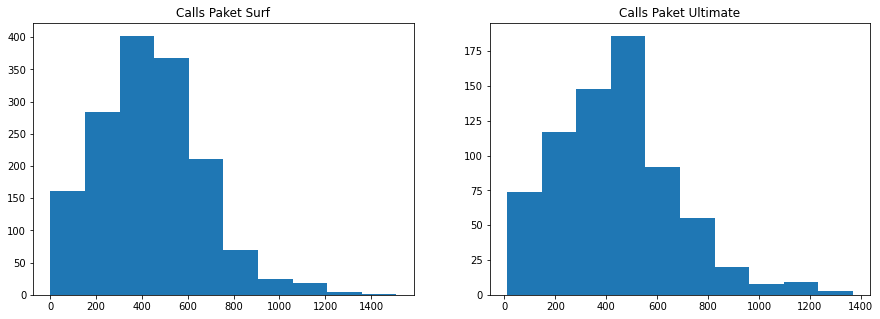

In [83]:
#Histogram
plt.figure(figsize=(15,5),frameon=True)
plt.subplot(1,2,1)
plt.title('Calls Paket Surf')
plt.hist(merge_full_surf_calls['calls'])

plt.subplot(1,2,2)
plt.title('Calls Paket Ultimate')
plt.hist(merge_full_ultimate_calls['calls'])
plt.show()

KESIMPULAN
1. Data Calls memiliki nilai 0 sebesar 47% dari total data 
2. Paket surf memberikan keuntungan lebih dari customer yang menggunakan layanan calls dari batas paket nya
3. Dari Histogram yang diberikan paket surf memiliki kemiringan ke kanan sedangkan paket Ultimate memiliki kemiringan ke kiri
4. kebanyakan customer jarang menggunakan layanan calls sampai batas paket

### Data Internet

In [84]:
# Cek besarnya nilai 0 pada kolom calls terhadap total data
merge_full[merge_full['gb_used'] == 0]['gb_used'].count() / len(merge_full['gb_used']) * 100

16.473317865429234

Dikarenakan nilai 0 pada kolom gb_used sebesar 16 % dari total data, maka sebelum menganalisa lebih lanjut nilai 0 akan di hilankan untuk analisa bagian data internet
dan nilai 0 sendiri adalah user yang tidak memakai sama sekali layanan Internet di bulan tersebut

In [85]:
# data internet tanpa nilai 0
merge_full_isna_inet = merge_full[merge_full['gb_used'] != 0]

In [86]:
#Rata Rata dan total pendapatan over calls
merge_full_isna_inet.groupby('plan')[['gb_used','pay_over_internet']].agg({"gb_used" :"mean",'pay_over_internet':"sum"}).reset_index().rename(columns={"gb_used":"mean_gb_used"})

,plan,mean_gb_used,pay_over_internet
0,surf,10.803079,60100.0
1,ultimate,11.178445,7847.0


In [87]:
#Memisahkan paket surf dan ultimate
merge_full_surf_inet = merge_full_isna_inet[merge_full_isna_inet['plan'] == 'surf']
merge_full_ultimate_inet =merge_full_isna_inet[merge_full_isna_inet['plan'] == 'ultimate']

In [88]:
#Varians
var_surf_inet = np.var(merge_full_surf_inet['gb_used'])
var_ultimate_inet = np.var(merge_full_ultimate_inet['gb_used'])
print('Varians dari kolom gb_used paket surf adalah :',var_surf_inet) 
print('Varians dari kolom gb_used paket Ultimate adalah :',var_ultimate_inet) 

Varians dari kolom gb_used paket surf adalah : 117.99930980406579
Varians dari kolom gb_used paket Ultimate adalah : 145.29854599258326


In [89]:
#Standart Deviasi
std_surf_inet = np.std(merge_full_surf_inet['gb_used'])
std_ultimate_inet = np.std(merge_full_ultimate_inet['gb_used'])
print('Sandart Deviasi dari kolom gb_used paket surf adalah :',std_surf_inet) 
print('Sandart Deviasi dari kolom gb_used paket Ultimate adalah :',std_ultimate_inet) 

Sandart Deviasi dari kolom gb_used paket surf adalah : 10.86274872231084
Sandart Deviasi dari kolom gb_used paket Ultimate adalah : 12.053984652080127


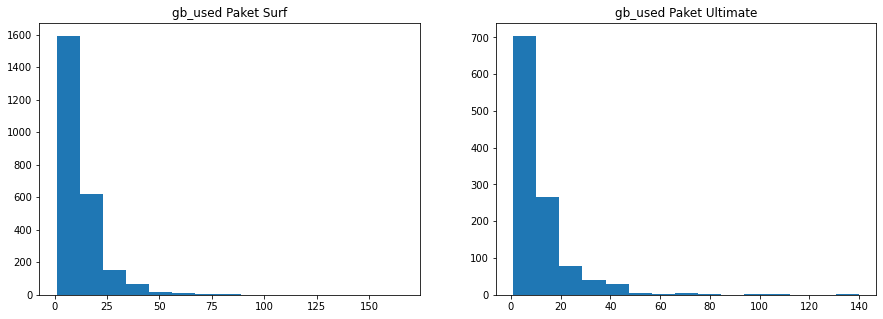

In [90]:
#Histogram
plt.figure(figsize=(15,5),frameon=True)
plt.subplot(1,2,1)
plt.title('gb_used Paket Surf')
plt.hist(merge_full_surf_inet['gb_used'],bins=15)

plt.subplot(1,2,2)
plt.title('gb_used Paket Ultimate')
plt.hist(merge_full_ultimate_inet['gb_used'],bins=15)
plt.show()

KESIMPULAN
1. Data Internet memiliki nilai 0 sebesar 16% dari total data 
2. Paket surf memberikan keuntungan lebih dari customer yang menggunakan layanan internet dari batas paket nya
3. Dari Histogram yang diberikan antara paket surf dan ultimate adalah condong ke kanan
4. kebanyakan customer jarang menggunakan layanan internet sampai batas paket

In [91]:
# Cek besarnya nilai 0 pada kolom calls terhadap total data
merge_full[merge_full['messages'] == 0]['messages'].count() / len(merge_full['messages']) * 100

31.554524361948953

Dikarenakan nilai 0 pada kolom messages sebesar 31 % dari total data, maka sebelum menganalisa lebih lanjut nilai 0 akan di hilankan untuk analisa bagian data messages
dan nilai 0 sendiri adalah user yang tidak memakai sama sekali layanan sms di bulan tersebut

In [92]:
# data sms tanpa nilai 0
merge_full_isna_sms = merge_full[merge_full['messages'] != 0]

In [93]:
#Rata Rata
merge_full_isna_sms.groupby('plan')[['messages','pay_over_messages']].agg({"messages" :"mean",'pay_over_messages':"sum"}).reset_index().rename(columns={"messages":"mean_messages"})

,plan,mean_messages,pay_over_messages
0,surf,24.792109,287.13
1,ultimate,27.787256,0.00


In [94]:
#Memisahkan paket surf dan ultimate
merge_full_surf_sms = merge_full_isna_sms[merge_full_isna_sms['plan'] == 'surf']
merge_full_ultimate_sms =merge_full_isna_sms[merge_full_isna_sms['plan'] == 'ultimate']

In [95]:
#Varians
var_surf_sms = np.var(merge_full_surf_sms['messages'])
var_ultimate_sms = np.var(merge_full_ultimate_sms['messages'])
print('Varians dari kolom messages paket surf adalah :',var_surf_sms) 
print('Varians dari kolom messages paket Ultimate adalah :',var_ultimate_sms) 

Varians dari kolom messages paket surf adalah : 956.8728158342946
Varians dari kolom messages paket Ultimate adalah : 1053.041070887234


In [96]:
#Standart Deviasi
std_surf_sms = np.std(merge_full_surf_sms['messages'])
std_ultimate_sms = np.std(merge_full_ultimate_sms['messages'])
print('Sandart Deviasi dari kolom messages paket surf adalah :',std_surf_sms) 
print('Sandart Deviasi dari kolom messages paket Ultimate adalah :',std_ultimate_sms) 

Sandart Deviasi dari kolom messages paket surf adalah : 30.933360888113896
Sandart Deviasi dari kolom messages paket Ultimate adalah : 32.45059430714997


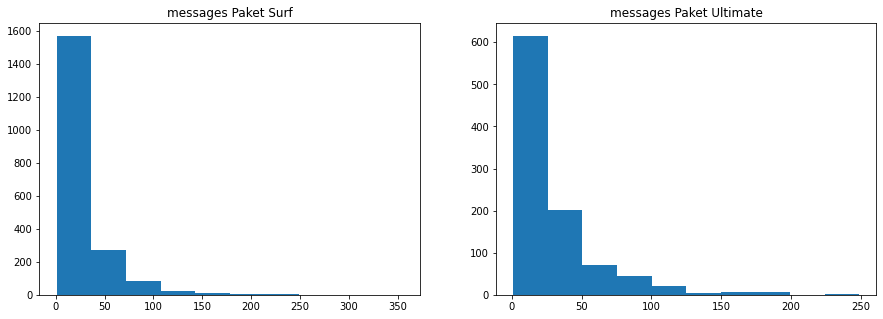

In [97]:
#Histogram
plt.figure(figsize=(15,5),frameon=True)
plt.subplot(1,2,1)
plt.title('messages Paket Surf')
plt.hist(merge_full_surf_sms['messages'])

plt.subplot(1,2,2)
plt.title('messages Paket Ultimate')
plt.hist(merge_full_ultimate_sms['messages'])
plt.show()

KESIMPULAN
1. Data Message memiliki nilai 0 sebesar 31% dari total data 
2. Paket surf memberikan keuntungan lebih dari customer yang menggunakan layanan sms dari batas paket nya
3. Dari Histogram yang diberikan antara paket surf dan ultimate adalah condong ke kanan
4. kebanyakan customer jarang menggunakan layanan sms sampai batas paket

## Uji Hipotesis


1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.


#### Hipotesis Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf

H0 = Rata rata pendapatan dari pengguna paket telepon Ultimate dan Surf adalah sama

H1 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak sama

In [98]:
#memisahkan 2 paket yang ada
merge_full_surf = merge_full[merge_full['plan'] == 'surf']
merge_full_ultimate = merge_full[merge_full['plan'] == 'ultimate']

In [99]:
#Varians 2 Paket
var_surf_profit = np.var(merge_full_surf['total_pay'])
var_ultimate_profit = np.var(merge_full_ultimate['total_pay'])
print('Varians dari kolom messages paket surf adalah :',var_surf_profit) 
print('Varians dari kolom messages paket Ultimate adalah :',var_ultimate_profit)

Varians dari kolom messages paket surf adalah : 5177.414706395629
Varians dari kolom messages paket Ultimate adalah : 1408.7476142392827


In [100]:
print('Perbedaan selisih variance antara paket surf dan profit',var_surf_profit / var_ultimate_profit * 100)

Perbedaan selisih variance antara paket surf dan profit 367.5189689099427


Dikarenakan hasil Varians antar paket Ultimate lebih dari 100% dari maka equal var = False

Pengujian Hipotesis menggunakan Persamaan Rata rata Dua populasi Statistik

In [101]:
print('Rata rata pendapatan paket surf adalah', merge_full_surf['total_pay'].mean())
print('Rata rata pendapatan paket Ultimate adalah', merge_full_ultimate['total_pay'].mean())

Rata rata pendapatan paket surf adalah 41.71093653516295
Rata rata pendapatan paket Ultimate adalah 75.62508960573477


In [102]:
hip_dua_paket = st.ttest_ind(merge_full_surf['total_pay'], merge_full_ultimate['total_pay'],equal_var = False)
alpha = 0.05
print('p-value: ', hip_dua_paket.pvalue)

if hip_dua_paket.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol") 

p-value:  1.1764616683355557e-87
Kita menolak hipotesis nol


Dapat dilihat dari hasil p-value dari total pay dari masing masing paket adalah minus/ lebih kecil dari 0, menandakan bahwa kita menolak hipotesis nol atau, Rata rata pendapatan pengguna pake telepon yang berbeda.
dan Hipotesis Alternatif yang di dapat.

#### Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

H0 =  Rata rata pendapatan dari pengguna wilayah NY-NJ dengan pendapatan dari wilayah lain sama

H1 = Rata rata pendapatan dari pengguna wilayah NY-NJ dengan pendapatan dari wilayah lain tidak sama

In [103]:
#memisahkan kota Ny-NJ dengan kota lain
merge_full_ny = merge_full[merge_full['city'].str.contains('NY-NJ')]
merge_full_not_ny =merge_full.drop(index= merge_full[merge_full['city'].str.contains('NY-NJ')].index)

In [104]:
#Varians 2 Kota
var_surf_ny = np.var(merge_full_ny['total_pay'])
var_ultimate_not_ny = np.var(merge_full_not_ny['total_pay'])
print('Varians pendapatan kota NY_NJ adalah :',var_surf_ny) 
print('Varians pendapatan kota selain NY_NJ adalah :',var_ultimate_not_ny)

Varians pendapatan kota NY_NJ adalah : 5166.928342403809
Varians pendapatan kota selain NY_NJ adalah : 4025.250778327431


Dikarenakan hasil Varian antar 2 kota hampir sama maka equal_var diambil True

In [105]:
print('Rata rata pendapatan kota NY_NJ adalah', merge_full_ny['total_pay'].mean())
print('Rata rata pendapatan kota selain NY_NJ adalah', merge_full_not_ny['total_pay'].mean())

Rata rata pendapatan kota NY_NJ adalah 53.225079136690645
Rata rata pendapatan kota selain NY_NJ adalah 52.58449515905948


Pengujian Hipotesis menggunakan Persamaan Rata rata Dua populasi Statistik

In [106]:
hip_dua_kota = st.ttest_ind(merge_full_ny['total_pay'], merge_full_not_ny['total_pay'],equal_var = True)
alpha = 0.05
print('p-value: ', hip_dua_kota.pvalue)

if hip_dua_kota.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol") 

p-value:  0.811637770763616
Kita tidak dapat menolak hipotesis nol


Dari hasil yang di dapat kita tidka bisa menolak hipotesis bahwa rata rata pendapat di kota NY-NJ sama dengan pendapatan rata rata kota selain NY_NJ.

## Kesimpulan

Setelah melakukan Eksplorasi Data 500 klien Megaline di dapat hasil sebagai berikut.
1. Pra Pemrosesan :
    1. Mengelompokan setiap data yang diperlukan agar bisa di gabungkan
    2. Menggabungkan ke 5 Data yang ada , dengan memperbaiki kualitas data yang dibutuhkan
    3. Menghitung Pendapatan bulanan pada data sehingga data akhir bisa digunakan untuk menganalisa.
2. Aanalisa Data :
    1. Data Akhir memiliki nilai 0 di setiap kolom (calls,Internet,Messages) dikarenaka customer tidak memakai layanan nya di bulan tersebut, yang akhirnya kita drop agar analisa data di setiap kolom (calls,Internet,Messages) lebih maksimal.
    2. Rata rata, varians, standar deviasinya dan histogram. memiliki perbedaan di setiap Data (calls,Internet,Messages)
3. Hipotesis :
    1. Pada Hipotesis Rata rata pendapatan Paket surf dan Ultimate mendapatkan hasil bahwa kita menolak pendapatan rata rata nya sama, dikarenakan pendapatan rata rata paket surf dan Ultimate memiliki perbandingan cukup jauh, di 41 dan 75.
    2. Pada Hipotesis Rata rata pendapatan kota NY-NJ dengan kota lain mendapatkan hasil bahwa kita tidak bisa menolak pendapatan rata rata nya mungkin sama,  dikarenakan hasil rata rata nya tidak beda jauh.
    3. Paket Ultimate memiliki keuntungan paling besar di banding paket surf
    4. Kota NY-NJ menyamai pendapatan rata rata yang sama dengan total pendapatan kota lain nya.